# Iris Prediction

Font: 
- https://www.analyticsvidhya.com/blog/2018/05/24-ultimate-data-science-projects-to-boost-your-knowledge-and-skills/
- Dua, D. and Graff, C. (2019). UCI Machine Learning Repository [http://archive.ics.uci.edu/ml]. Irvine, CA: University of California, School of Information and Computer Science

## Introduction


The objective of this analisys is to predict the class of the flower based on available attributes. Below it's shown the data information: 

1. Title: Iris Plants Database
	Updated Sept 21 by C.Blake - Added discrepency information
<br>
2. Sources:
     (a) Creator: R.A. Fisher
     (b) Donor: Michael Marshall (MARSHALL%PLU@io.arc.nasa.gov)
     (c) Date: July, 1988
<br>
3. Past Usage:
   - Publications: too many to mention!!!  Here are a few.
   1. Fisher,R.A. "The use of multiple measurements in taxonomic problems"
      Annual Eugenics, 7, Part II, 179-188 (1936); also in "Contributions
      to Mathematical Statistics" (John Wiley, NY, 1950).
   2. Duda,R.O., & Hart,P.E. (1973) Pattern Classification and Scene Analysis.
      (Q327.D83) John Wiley & Sons.  ISBN 0-471-22361-1.  See page 218.
   3. Dasarathy, B.V. (1980) "Nosing Around the Neighborhood: A New System
      Structure and Classification Rule for Recognition in Partially Exposed
      Environments".  IEEE Transactions on Pattern Analysis and Machine
      Intelligence, Vol. PAMI-2, No. 1, 67-71.
      -- Results:
         -- very low misclassification rates (0% for the setosa class)
   4. Gates, G.W. (1972) "The Reduced Nearest Neighbor Rule".  IEEE 
      Transactions on Information Theory, May 1972, 431-433.
      -- Results:
         -- very low misclassification rates again
   5. See also: 1988 MLC Proceedings, 54-64.  Cheeseman et al's AUTOCLASS II
      conceptual clustering system finds 3 classes in the data.
     
     <br>
      
4. Relevant Information:
   - This is perhaps the best known database to be found in the pattern
       recognition literature.  Fisher's paper is a classic in the field
       and is referenced frequently to this day.  (See Duda & Hart, for
       example.)  The data set contains 3 classes of 50 instances each,
       where each class refers to a type of iris plant.  One class is
       linearly separable from the other 2; the latter are NOT linearly
       separable from each other.
   - Predicted attribute: class of iris plant.
   - This is an exceedingly simple domain.
   - This data differs from the data presented in Fishers article
	(identified by Steve Chadwick,  spchadwick@espeedaz.net )
	The 35th sample should be: 4.9,3.1,1.5,0.2,"Iris-setosa"
	where the error is in the fourth feature.
	The 38th sample: 4.9,3.6,1.4,0.1,"Iris-setosa"
	where the errors are in the second and third features.  
<br>

5. Number of Instances: 150 (50 in each of three classes)
<br>

6. Number of Attributes: 4 numeric, predictive attributes and the class
<br>




## Importing libraries

In [1]:
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

## Importing Data Base


In [7]:
data_raw = pd.read_csv("iris.csv", header=None)
display(data_raw)

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


## Table Description

   1. sepal_Len: sepal length (cm)
   2. sepal_Wid: sepal width (cm)
   3. petal_Len: petal length (cm)
   4. petal_Wid: petal width (cm)
   5. Class: (classes)
      - Iris Setosa
      - Iris Versicolour
      - Iris Virginica

## Treating Data

In [3]:
#getting raw data
data = data_raw

#naming columns
data.columns = ["sepal_Len", "sepal_Wid", "petal_Len", "petal_Wid", "Class"]


#showing data
display(data)

,sepal_Len,sepal_Wid,petal_Len,petal_Wid,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


## Analisys


In [12]:
print("Data Info")
display(data.info())

print("Data statistics")
display(data.describe().round(1))

Data Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sepal_Len  150 non-null    float64
 1   sepal_Wid  150 non-null    float64
 2   petal_Len  150 non-null    float64
 3   petal_Wid  150 non-null    float64
 4   Class      150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


None

Data statistics


,sepal_Len,sepal_Wid,petal_Len,petal_Wid
count,150.0,150.0,150.0,150.0
mean,5.8,3.1,3.8,1.2
std,0.8,0.4,1.8,0.8
min,4.3,2.0,1.0,0.1
25%,5.1,2.8,1.6,0.3
50%,5.8,3.0,4.4,1.3
75%,6.4,3.3,5.1,1.8
max,7.9,4.4,6.9,2.5


#### Obs
- There's no null value. Treatment not needed.
- considering that we are talking about petals and sepals sizes, min and max measure values seems fine.

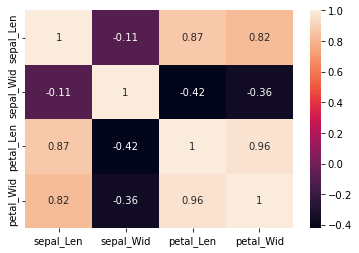

In [5]:
data_corr = data.corr()
plt.figure()
sns.heatmap(data_corr, annot=True)
plt.show()

#### Obs: 

There's correlation between petal_wid with petal_len (expected) and between sepal_len with both petal_wid and petal_len (object of study). 

In [13]:
wid_regression = px.scatter(data, x="sepal_Len", y="petal_Wid", trendline='ols', title="sepal_Len x petal_Wid")
wid_regression.show()

len_regression = px.scatter(data, x="sepal_Len", y="petal_Len", trendline='ols', title="sepal_Len x petal_Len")
len_regression.show()